# Test Estadísticos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,8) 

In [2]:
sales = pd.read_csv("../regresion_lineal/ficheros/sales2.csv", index_col=0)
sales.sample(4)

,area_code,state,market,market_size,profit,margin,sales,cogs,total_expenses,marketing,...,budget_cogs,budget_margin,budget_sales,productid,date,product_type,product,type,mes,año
3750,904,Florida,East,Major Market,58.0,112.0,195.0,83.0,54.0,27.0,...,70.0,120.0,190.0,6,2010-04-01,Espresso,Decaf Espresso,Decaf,4,2010
2032,562,California,West,Major Market,92.0,100.0,190.0,78.0,38.0,25.0,...,60.0,90.0,150.0,10,2011-04-01,Herbal Tea,Mint,Decaf,4,2011
2484,618,Illinois,Central,Major Market,197.0,179.0,322.0,123.0,46.0,34.0,...,110.0,170.0,280.0,8,2011-12-01,Herbal Tea,Chamomile,Decaf,12,2011
3387,781,Massachusetts,East,Major Market,16.0,32.0,53.0,21.0,16.0,5.0,...,20.0,30.0,50.0,13,2010-04-01,Tea,Green Tea,Regular,4,2010



### Error de tipo I y error de tipo II:

- H0: No aumenta el beneficio con el marketing ni las ventas.
- H1: El beneficio aumenta con el marketing y las ventas.


Error de Tipo I: Decimos que no aumenta, cuando sí aumenta.

Error de Tipo II: Decimos que aumenta, cuando realmente no aumenta.

El error de Tipo II es el que no nos interesa cometer, dado que nuestra empresa sufriría pérdidas.

### ¿Es nuestra variable respuesta asimétrica?

In [3]:
sales["profit"].skew()

1.055870460824596

- En este caso, vemos que nuestra variable respuesta tiene una distribución asimétrica positiva, es decir, mayor que 0 y, por lo tanto, los datos no son normales.

### ¿Qué tipo de curtosis presenta nuestra variable respuesta?

In [4]:
kurtosistest(sales["profit"])

KurtosistestResult(statistic=8.589216828780973, pvalue=8.756413236225312e-18)

- Vemos que nuestro p-valor es menor que 0.05, lo que nos indica este test es que los datos no son normales y podemos rechazar la H0.

### ¿Es nuestra variable respuesta normal? Lo demostramos visual y analíticamente.

In [5]:
# probamos el test Shapiro para ver si nuestra variable respuesta es normal

stats.shapiro(sales["profit"])

ShapiroResult(statistic=0.9109621644020081, pvalue=1.8216880036222622e-44)

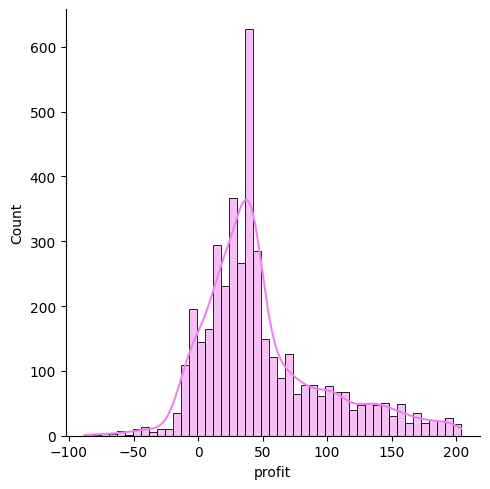

In [6]:
sns.displot(sales["profit"], kde = True, color = "violet");

- Como observamos con el test Shapiro y el displot, nuestra variable respuesta no tiene una distribución normal y es asimétrica, ya que su forma se aleja a la forma de una campana de Gauss.

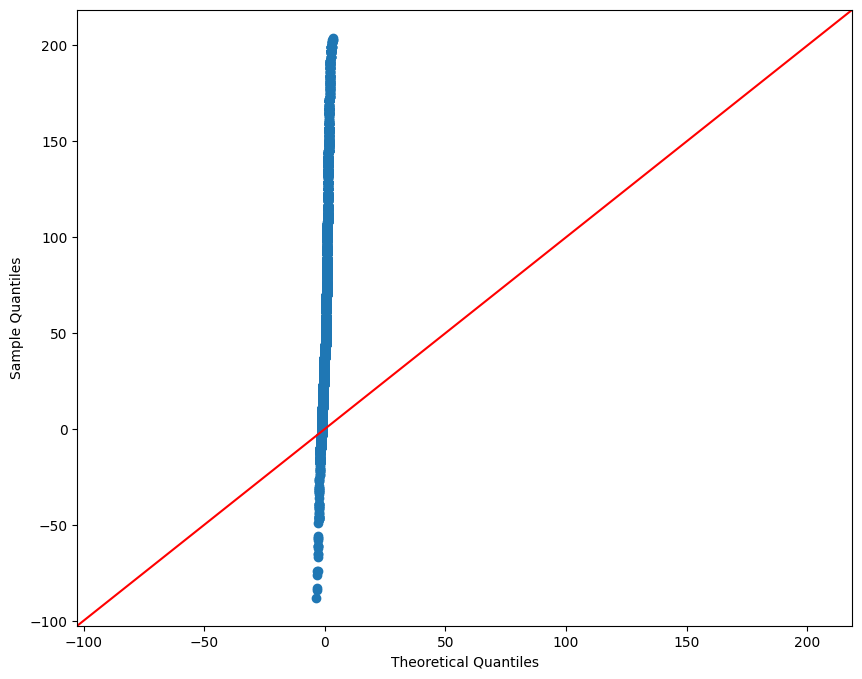

In [7]:
sm.qqplot(sales["profit"], line ='45');

- Como observamos en el qqplot, nuestra variable no está nada ajustada a la recta, lo cual nos indica una distribución no normal.